In [2]:
import pandas as pd
vendas_df = pd.read_csv('Contoso - Vendas - 2017.csv', sep = ';')
clientes_df = pd.read_csv('Contoso - Clientes.csv', sep = ';')
lojas_df = pd.read_csv('Contoso - Lojas.csv', sep = ';')
produtos_df = pd.read_csv('Contoso - Cadastro Produtos.csv', sep = ';')
promocoes_df = pd.read_csv('Contoso - Promocoes.csv', sep = ';')

clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[[ 'ID Produto', 'Nome do Produto']]
promocoes_df = promocoes_df[['ID Promocao', 'Percentual Desconto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(promocoes_df, on='ID Promocao')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')
vendas_df = vendas_df.rename(columns = {'E-mail': 'E-mail dos clientes'})
vendas_df

Numero da Venda Data da Venda Data do Envio  ID Canal  ID Loja  \
0                     1    01/01/2017    02/01/2017         1       86   
1                191019    20/03/2017    21/03/2017         1      172   
2                 18610    08/01/2017    10/01/2017         2      200   
3                 26350    12/01/2017    18/01/2017         6       21   
4                287704    23/04/2017    26/04/2017         3       76   
...                 ...           ...           ...       ...      ...   
980637           239298    08/04/2017    14/04/2017         6      254   
980638           169447    11/03/2017    13/03/2017         2      254   
980639           105791    13/02/2017    14/02/2017         1      278   
980640           153585    04/03/2017    09/03/2017         5      296   
980641           175501    14/03/2017    16/03/2017         2      277   

        ID Produto  ID Promocao  ID Cliente  Quantidade Vendida  \
0              981            2        6825                   9   
1              376            2        6825                   9   
2              448            2        6825                  48   
3              568            2        6825                   9   
4              280            1        6825                  10   
...            ...          ...         ...                 ...   
980637         750            6       39372                   9   
980638        1212            6       39061                   4   
980639         411            6       38270                   9   
980640        1639            6          50                   4   
980641        2489            6         746                  80   

        Quantidade Devolvida  \
0                          1   
1                          0   
2                          0   
3                          0   
4                          0   
...                      ...   
980637                     1   
980638                     1   
980639                     0   
980640                     0   
980641                     1   

                                          Nome do Produto  \
0              A. Datum Advanced Digital Camera M300 Pink   
1                   Adventure Works Laptop12 M1201 Silver   
2                          WWI Desktop PC1.80 E1801 Black   
3                   Proseware Projector 480p DLP12 Silver   
4       Contoso Home Theater System 2.1 Channel M1210 ...   
...                                                   ...   
980637     Contoso Education Essentials Bundle M300 Black   
980638    Fabrikam Social Videographer 1'' 25mm E400 Grey   
980639                      Proseware Laptop15 M510 White   
980640          Contoso DVD 38 DVD Storage Binder E25 Red   
980641     Contoso Rubberized Skin BlackBerry E100 Silver   

                       Nome da Loja Percentual Desconto  \
0              Loja Contoso Austin                 0,05   
1            Loja Contoso Hartford                 0,05   
2             Loja Contoso Catalog                 0,05   
3         Loja Contoso Wheat Ridge                 0,05   
4       Loja Contoso Beaumont No.1                    0   
...                             ...                 ...   
980637        Loja Contoso Yerevan                  0,2   
980638        Loja Contoso Yerevan                  0,2   
980639         Loja Contoso Urumqi                  0,2   
980640   Loja Contoso Bangkok No.2                  0,2   
980641  Loja Contoso Shanghai No.1                  0,2   

                     E-mail dos clientes  
0                 rbrumfieldmy@ameblo.jp  
1                 rbrumfieldmy@ameblo.jp  
2                 rbrumfieldmy@ameblo.jp  
3                 rbrumfieldmy@ameblo.jp  
4                 rbrumfieldmy@ameblo.jp  
...                                  ...  
980637         nina6@adventure-works.com  
980638    fernando55@adventure-works.com  
980639  jacqueline11@adventure-works.com  
980640          znorcock1d@canalblog.com  
980641        

karen33@adventure-works.com        77
chloe77@adventure-works.com        74
julia43@adventure-works.com        69
destiny66@adventure-works.com      68
gilbert9@adventure-works.com       68
                                   ..
alyssa59@adventure-works.com        1
christian31@adventure-works.com     1
rharnelljo@gizmodo.com              1
lchazottedk@altervista.org          1
lstansallkp@google.cn               1
Name: E-mail dos clientes, Length: 38907, dtype: int64

<AxesSubplot:>

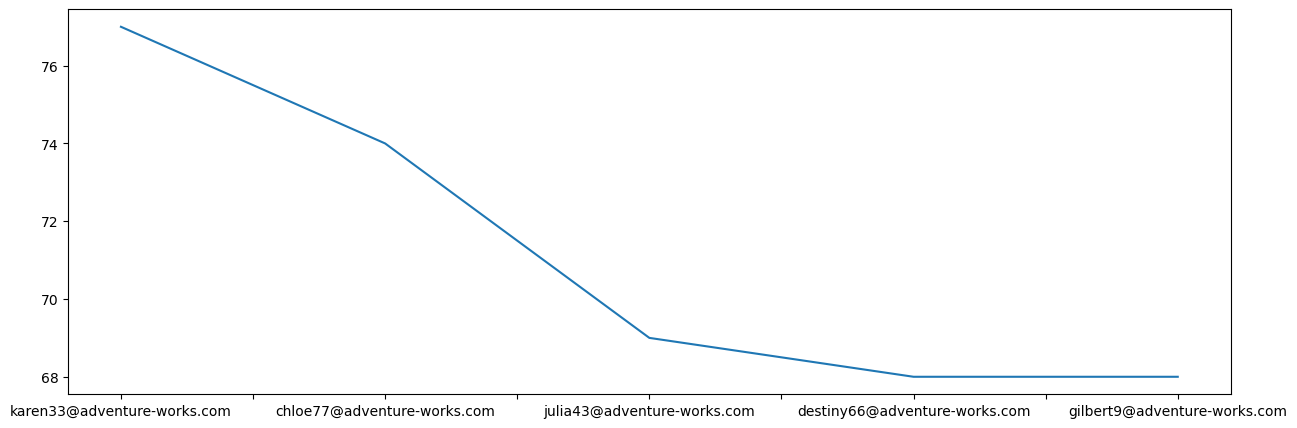

In [4]:
frequencia_clientes = vendas_df['E-mail dos clientes'].value_counts()
display(frequencia_clientes)
frequencia_clientes[:5].plot(figsize=(15, 5))

<AxesSubplot:xlabel='Nome da Loja'>

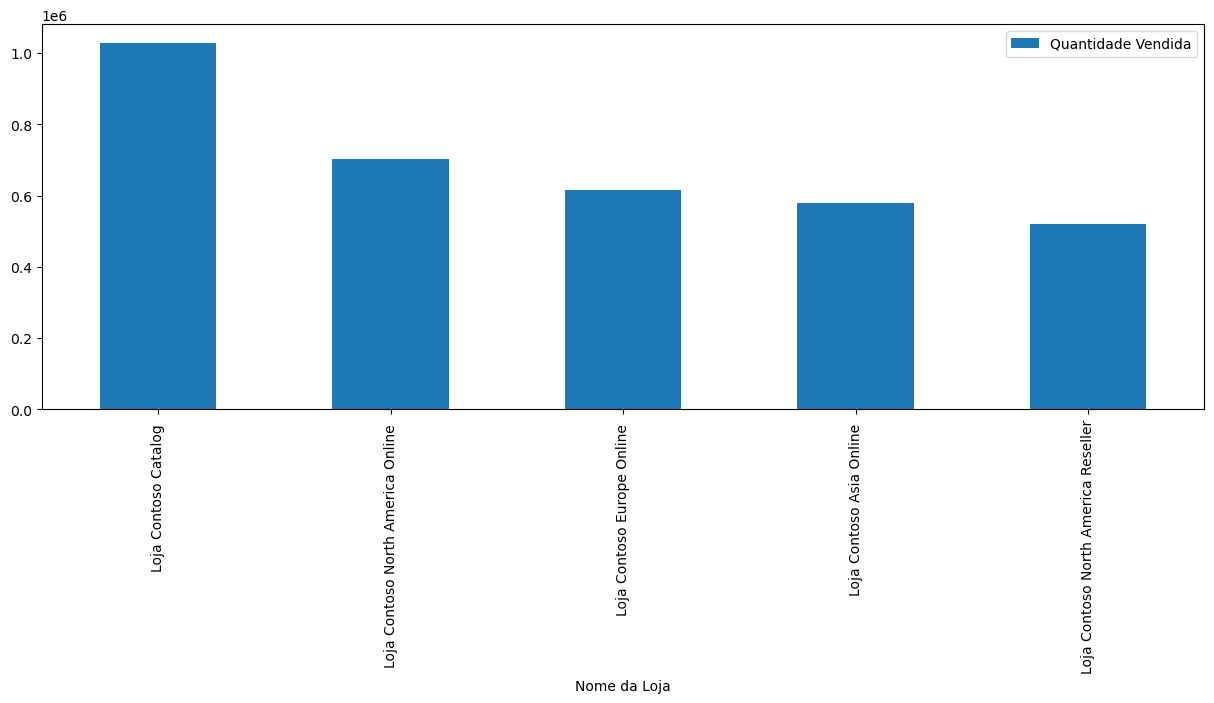

In [18]:
vendas = vendas_df.groupby('Nome da Loja').sum()
vendas = vendas[['Quantidade Vendida']]
vendas = vendas.sort_values('Quantidade Vendida', ascending = False)
display(vendas[:5].plot(figsize = (15, 5), kind = 'bar'))

In [24]:
produtos = vendas_df.groupby('Nome do Produto').sum()
produtos = produtos[['Quantidade Vendida']]
produtos = produtos.sort_values('Quantidade Vendida', ascending = False)
display(produtos['Quantidade Vendida'].idxmin(), produtos['Quantidade Vendida'].min())

'SV 16xDVD E340 Silver'

86